In [2]:
import torch
import time
from sbi import utils as utils
from sbi import analysis as analysis
from cost_aware_snpe_c import CostAwareSNPE_C
from sbi.inference.snpe.snpe_c import SNPE_C
from simulators import temporal_sir, bern_sir, homo_sir
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({
    'font.family' : 'times',
    'font.size' : 14.0,
    'lines.linewidth' : 2,
    'lines.antialiased' : True,
    'axes.facecolor': 'fdfdfd',
    'axes.edgecolor': '777777',
    'axes.linewidth' : 1,
    'axes.titlesize' : 'medium',
    'axes.labelsize' : 'medium',
    'axes.axisbelow' : True,
    'xtick.major.size'     : 0,      # major tick size in points
    'xtick.minor.size'     : 0,      # minor tick size in points
    'xtick.major.pad'      : 6,      # distance to major tick label in points
    'xtick.minor.pad'      : 6,      # distance to the minor tick label in points
    'xtick.color'          : '333333', # color of the tick labels
    'xtick.labelsize'      : 'medium', # fontsize of the tick labels
    'xtick.direction'      : 'in',     # direction: in or out
    'ytick.major.size'     : 0,      # major tick size in points
    'ytick.minor.size'     : 0,      # minor tick size in points
    'ytick.major.pad'      : 6,      # distance to major tick label in points
    'ytick.minor.pad'      : 6,      # distance to the minor tick label in points
    'ytick.color'          : '333333', # color of the tick labels
    'ytick.labelsize'      : 'medium', # fontsize of the tick labels
    'ytick.direction'      : 'in',     # direction: in or out
    'axes.grid' : False,
    'grid.alpha' : 0.3,
    'grid.linewidth' : 1,
    'legend.fancybox' : True,
    'legend.fontsize' : 'Small',
    'figure.figsize' : (2.5, 2.5),
    'figure.facecolor' : '1.0',
    'figure.edgecolor' : '0.5',
    'hatch.linewidth' : 0.1,
    'text.usetex' : True
    })

color_map = {'green': '#009E60', 'orange': '#C04000',
              'blue': '#00416A', 'black':'#3A3B3C',
              'purple': '#843B62', 'red': '#C41E3A'}


plt.rcParams['text.latex.preamble'] = r'\usepackage{serif}'

In [11]:
def cost_linear(theta, w, b):
    return w * theta + b

# Temporal SIR

In [27]:
N = 50
n_rep = 100

beta = torch.linspace(0.001, 1, N)
beta_fixed = 1

gamma = torch.linspace(0.1, 1, N)
gamma_fixed = 0.05

In [28]:
times_vs_beta = torch.zeros(N)
for i in range(N):
    print("progress: ", i)
    st = time.time()
    for _ in range(n_rep):
        result = temporal_sir.simSIR(beta[i], gamma_fixed, device=torch.device('cpu'))
    et = time.time()
    times_vs_beta[i] = (et - st) / n_rep

print(times_vs_beta)

progress:  0
progress:  1
progress:  2
progress:  3
progress:  4
progress:  5
progress:  6
progress:  7
progress:  8
progress:  9
progress:  10
progress:  11
progress:  12
progress:  13
progress:  14
progress:  15
progress:  16
progress:  17
progress:  18
progress:  19
progress:  20
progress:  21
progress:  22
progress:  23
progress:  24
progress:  25
progress:  26
progress:  27
progress:  28
progress:  29
progress:  30
progress:  31
progress:  32
progress:  33
progress:  34
progress:  35
progress:  36
progress:  37
progress:  38
progress:  39
progress:  40
progress:  41
progress:  42
progress:  43
progress:  44
progress:  45
progress:  46
progress:  47
progress:  48
progress:  49
tensor([7.5839e-05, 9.5882e-05, 6.0520e-04, 8.6199e-02, 5.6025e-01, 7.0269e-01,
        1.4152e+00, 1.4054e+00, 1.5568e+00, 1.6289e+00, 1.8289e+00, 1.8211e+00,
        2.0051e+00, 2.0355e+00, 2.2937e+00, 2.1687e+00, 2.1424e+00, 2.1356e+00,
        2.1569e+00, 2.2317e+00, 2.2299e+00, 2.1539e+00, 2.2742e+00, 2.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


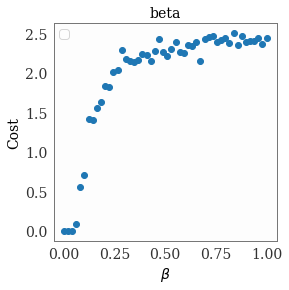

In [33]:
# Cost function
w = (times_vs_beta[N-1] - times_vs_beta[0]) / (beta[N-1] - beta[0]) 
b = -w * beta[0] + times_vs_beta[0]

# Plotting figure
plt.figure(figsize=(4, 4))
# plt.scatter(theta[0:N, 0], elapsed_time / elapsed_time.max())
plt.scatter(beta, times_vs_beta)
# plt.plot(beta, cost_linear(beta, w, b), color = "C1", label = "$c(\\theta)$")
plt.title("beta")
plt.xlabel("$\\beta$")
plt.ylabel("Cost")
plt.legend()
plt.savefig("beta_vs_cost.png")
plt.show()

In [35]:
n_rep = 50
times_vs_gamma = torch.zeros(N)
for i in range(N):
    print("progress: ", i)
    st = time.time()
    for _ in range(n_rep):
        result = temporal_sir.simSIR(beta_fixed, gamma[i], device=torch.device('cpu'))
    et = time.time()
    times_vs_gamma[i] = (et - st) / n_rep

print(times_vs_gamma)

progress:  0
progress:  1
progress:  2
progress:  3
progress:  4
progress:  5
progress:  6
progress:  7
progress:  8
progress:  9
progress:  10
progress:  11
progress:  12
progress:  13
progress:  14
progress:  15
progress:  16
progress:  17
progress:  18
progress:  19
progress:  20
progress:  21
progress:  22
progress:  23
progress:  24
progress:  25
progress:  26
progress:  27
progress:  28
progress:  29
progress:  30
progress:  31
progress:  32
progress:  33
progress:  34
progress:  35
progress:  36
progress:  37
progress:  38
progress:  39
progress:  40
progress:  41
progress:  42
progress:  43
progress:  44
progress:  45
progress:  46
progress:  47
progress:  48
progress:  49
tensor([2.4529e+00, 2.4384e+00, 2.4456e+00, 2.3824e+00, 2.4226e+00, 2.3351e+00,
        2.2194e+00, 2.4977e+00, 2.4308e+00, 2.1644e+00, 2.0489e+00, 1.7806e+00,
        1.8168e+00, 1.8492e+00, 1.5703e+00, 1.8338e+00, 1.5780e+00, 1.5714e+00,
        1.4139e+00, 1.2572e+00, 1.1223e+00, 1.2624e+00, 1.2823e+00, 1.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


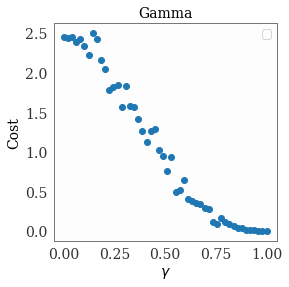

In [36]:
# Cost function
alpha = (times_vs_gamma[N-1] - times_vs_gamma[0]) / (gamma[N-1] - gamma[0]) 
beta = -alpha * gamma[0] + times_vs_gamma[0]

# Plotting figure
plt.figure(figsize=(4, 4))
# plt.scatter(theta[0:N, 0], elapsed_time / elapsed_time.max())
plt.scatter(gamma, times_vs_gamma)
# plt.plot(gamma, cost_linear(gamma, alpha, beta), color = "C1", label = "$c(\\theta)$")
plt.title("Gamma")
plt.xlabel("$\\gamma$")
plt.ylabel("Cost")
plt.legend()
plt.savefig("gamma_vs_cost.png")
plt.show()

# Figure 1

In [8]:
N = 10
n_train_pair = 50
n_rep = 10

beta_range = np.linspace(0, 1, N)
gamma_range = np.linspace(0, 1, N)

beta_train = np.random.rand(n_train_pair, 1)
gamma_train = np.random.rand(n_train_pair, 1)

beta_grid, gamma_grid = np.meshgrid(beta_range, gamma_range)
theta_grid = np.hstack((beta_grid.reshape(-1, 1), gamma_grid.reshape(-1, 1)))

cost_real = np.zeros([N, N])
cost_gp = np.zeros([N, N])

[autoreload of scipy.sparse.linalg.isolve.iterative failed: Traceback (most recent call last):
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/scipy/__init__.py", line 137, in __getattr__
KeyError: '_lib'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/huangd5/anaconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/huangd5/anacond

[autoreload of numpy.lib.stride_tricks failed: Traceback (most recent call last):
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 289, in update_function
    setattr(old, name, getattr(new, name))
ValueError: sliding_window_view() requires a code object with 0 free vars, not 3
]
[autoreload of numpy.linalg.linalg failed: Traceback (most recent call last):
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload

[autoreload of numpy.testing._private.utils failed: Traceback (most recent call last):
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/huangd5/anaconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/numpy/testing/_private/utils.py", line 53, in <module>
    HAS_LAPACK64 = numpy.linalg.lapack_lite._ilp64
AttributeError: module 'numpy.linalg' has no attribute 'lapack_lite'
]
[autoreload of numpy.testing

[autoreload of google.protobuf.internal.containers failed: Traceback (most recent call last):
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 345, in update_class
    update_instances(old, new)
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 303, in update_instances
    ref.__class__ = new
TypeError: __class__ assignment: 'RepeatedScalarFieldContainer' object layout differs from 'RepeatedScalarFieldContainer'
]
[autoreload of googl

[autoreload of tensorboard.compat.tensorflow_stub.flags failed: Traceback (most recent call last):
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 345, in update_class
    update_instances(old, new)
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 303, in update_instances
    ref.__class__ = new
  File "/Users/huangd5/anaconda3/lib/python3.9/site-packages/tensorboard/compat/tensorflow_stub/flags.py", line 86, in __setattr__
    retu

In [137]:
for i in range(N):
    for j in range(N):
        st = time.time()
        for _ in range(n_rep):
            result = temporal_sir.simSIR(beta_range[i], gamma_range[j], device=torch.device('cpu'))
        et = time.time()
        cost_real[i, j] = (et - st) / n_rep
    print(i)

0
1
2
3
4
5
6
7
8
9


In [185]:
np.save("cost.npy", cost_real)

In [201]:
cost_real

array([[1.38401985e-04, 1.24406815e-04, 1.30200386e-04, 1.02901459e-04,
        1.00183487e-04, 9.95874405e-05, 9.88960266e-05, 9.89913940e-05,
        9.88006592e-05, 9.82046127e-05],
       [2.64023030e+00, 4.48298454e-04, 2.36392021e-04, 1.40595436e-04,
        9.65833664e-05, 9.81807709e-05, 8.15153122e-05, 6.68764114e-05,
        7.27891922e-05, 1.02615356e-04],
       [2.68072467e+00, 5.66977096e-01, 1.54071093e-02, 4.36997414e-04,
        1.46579742e-04, 1.44195557e-04, 1.21712685e-04, 9.25302505e-05,
        8.14914703e-05, 8.54969025e-05],
       [2.53627143e+00, 1.07382462e+00, 4.31169295e-01, 3.19981575e-04,
        2.37226486e-04, 3.00288200e-04, 1.45196915e-04, 7.15017319e-05,
        2.66504288e-04, 1.17492676e-04],
       [2.55152898e+00, 1.55452290e+00, 1.06884110e+00, 5.75922966e-02,
        5.76050282e-03, 2.39801407e-04, 2.38823891e-04, 2.65860558e-04,
        8.74042511e-05, 1.40786171e-04],
       [2.54108610e+00, 2.35291722e+00, 1.34360781e+00, 5.31907201e-01,
   

In [6]:
beta_range = np.linspace(0, 1, N)
gamma_range = np.linspace(0, 1, N)
cost_real = np.load("data/cost.npy")
sns.set(style="white")

plt.figure(figsize=(7.5, 6))
sns.heatmap(cost_real.T, xticklabels=np.round(beta_range, 1), yticklabels=np.round(gamma_range, 1), annot=False, fmt=".2f", cmap='Reds').invert_yaxis()
# plt.title('Cost Heatmap by $\\beta$ and $\\gamma$', size=25)
plt.xlabel('$\\theta_1$', size=20)
plt.ylabel('$\\theta_2$', size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 540x432 with 2 Axes>

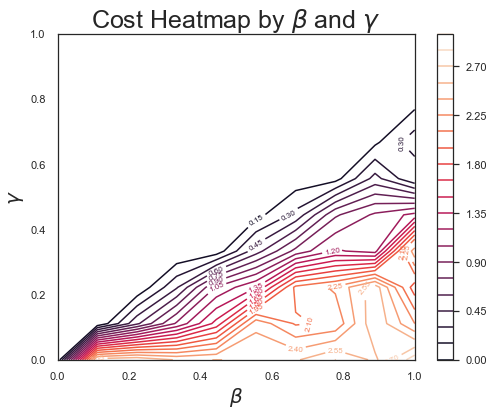

In [219]:
plt.figure(figsize=(8, 6))
contours = plt.contour(beta_range, gamma_range, cost_real.T, 20)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.title('Cost Heatmap by $\\beta$ and $\\gamma$', size=25)
plt.xlabel('$\\beta$', size=20)
plt.ylabel('$\\gamma$', size=20)
plt.show()

# GP

In [160]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

X = np.hstack((beta_train, gamma_train))
times_train = np.zeros(n_train_pair)

for i in range(n_train_pair):
    print(i)
    st = time.time()
    for _ in range(n_rep):
        result = temporal_sir.simSIR(X[i, 0], X[i, 1], device=torch.device('cpu'))
    et = time.time()
    times_train[i] = (et - st) / n_rep

kernel = C(1.0, (1e-4, 1e1)) * RBF([1, 1], (1e-4, 1e1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

gp.fit(X, times_train)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=[1, 1]),
                         n_restarts_optimizer=10)

In [161]:
gp.predict(np.array([0.9, 0.1]).reshape(1, 2))

array([3.21551029])

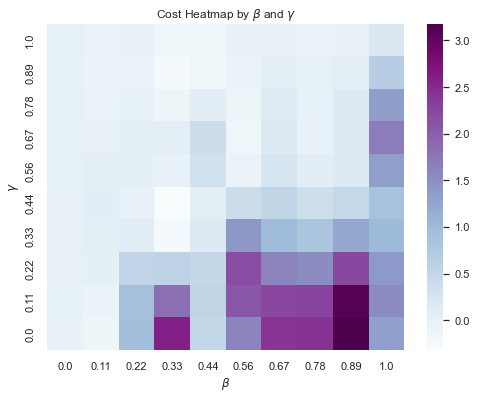

In [183]:
sns.set(style="white")

cost_gp = gp.predict(theta_grid).reshape(10, 10)

plt.figure(figsize=(8, 6))
sns.heatmap(cost_gp, xticklabels=np.round(beta_range, 2), yticklabels=np.round(gamma_range, 2), annot=False, fmt=".2f", cmap='BuPu').invert_yaxis()
plt.title('Cost Heatmap by $\\beta$ and $\\gamma$')
plt.xlabel('$\\beta$')
plt.ylabel('$\\gamma$')
plt.show()

# Bernoulli SIR

In [51]:
N = 50
n_rep = 10

beta = torch.linspace(0.001, 1, N)
beta_fixed = 1

gamma = torch.linspace(0.1, 1, N)
gamma_fixed = 0.05

In [43]:
times_vs_beta = torch.zeros(N)
for i in range(N):
    print("progress: ", i)
    st = time.time()
    for _ in range(n_rep):
        result = bern_sir.bernSIR(beta[i], gamma_fixed, p=0.05, device=torch.device('cpu'))
    et = time.time()
    times_vs_beta[i] = (et - st) / n_rep

print(times_vs_beta)

progress:  0
progress:  1
progress:  2
progress:  3
progress:  4
progress:  5
progress:  6
progress:  7
progress:  8
progress:  9
progress:  10
progress:  11
progress:  12
progress:  13
progress:  14
progress:  15
progress:  16
progress:  17
progress:  18
progress:  19
progress:  20
progress:  21
progress:  22
progress:  23
progress:  24
progress:  25
progress:  26
progress:  27
progress:  28
progress:  29
progress:  30
progress:  31
progress:  32
progress:  33
progress:  34
progress:  35
progress:  36
progress:  37
progress:  38
progress:  39
progress:  40
progress:  41
progress:  42
progress:  43
progress:  44
progress:  45
progress:  46
progress:  47
progress:  48
progress:  49
tensor([7.1781e-04, 9.2558e-03, 4.1519e-02, 4.2196e-02, 4.7410e-02, 9.9990e-02,
        1.2865e-01, 1.2583e-01, 1.6769e-01, 2.0466e-01, 1.7029e-01, 1.7817e-01,
        2.3740e-01, 2.6212e-01, 2.6963e-01, 3.4029e-01, 3.6855e-01, 3.3775e-01,
        3.3986e-01, 3.6653e-01, 3.9780e-01, 4.3776e-01, 4.9872e-01, 4.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


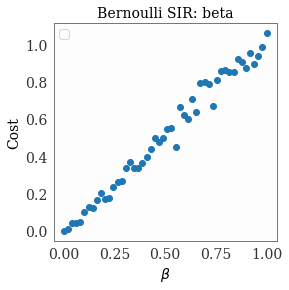

In [45]:
# Cost function
w = (times_vs_beta[N-1] - times_vs_beta[0]) / (beta[N-1] - beta[0]) 
b = -w * beta[0] + times_vs_beta[0]

# Plotting figure
plt.figure(figsize=(4, 4))
# plt.scatter(theta[0:N, 0], elapsed_time / elapsed_time.max())
plt.scatter(beta, times_vs_beta)
# plt.plot(beta, cost_linear(beta, w, b), color = "C1", label = "$c(\\theta)$")
plt.title("Bernoulli SIR: beta")
plt.xlabel("$\\beta$")
plt.ylabel("Cost")
plt.legend()
plt.savefig("beta_vs_cost.png")
plt.show()

In [52]:
n_rep = 10
times_vs_gamma = torch.zeros(N)
for i in range(N):
    print("progress: ", i)
    st = time.time()
    for _ in range(n_rep):
        result = bern_sir.bernSIR(beta_fixed, gamma[i], p=0.05, device=torch.device('cpu'))
    et = time.time()
    times_vs_gamma[i] = (et - st) / n_rep

print(times_vs_gamma)

progress:  0
progress:  1
progress:  2
progress:  3
progress:  4
progress:  5
progress:  6
progress:  7
progress:  8
progress:  9
progress:  10
progress:  11
progress:  12
progress:  13
progress:  14
progress:  15
progress:  16
progress:  17
progress:  18
progress:  19
progress:  20
progress:  21
progress:  22
progress:  23
progress:  24
progress:  25
progress:  26
progress:  27
progress:  28
progress:  29
progress:  30
progress:  31
progress:  32
progress:  33
progress:  34
progress:  35
progress:  36
progress:  37
progress:  38
progress:  39
progress:  40
progress:  41
progress:  42
progress:  43
progress:  44
progress:  45
progress:  46
progress:  47
progress:  48
progress:  49
tensor([0.5268, 0.4926, 0.3614, 0.2992, 0.3156, 0.2876, 0.2530, 0.2781, 0.1630,
        0.1987, 0.1707, 0.1272, 0.1579, 0.1906, 0.1530, 0.1412, 0.1341, 0.1074,
        0.1112, 0.0947, 0.0897, 0.0923, 0.0746, 0.1056, 0.0757, 0.0785, 0.0509,
        0.0585, 0.0650, 0.0706, 0.0923, 0.0625, 0.0520, 0.0706, 0.0627

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


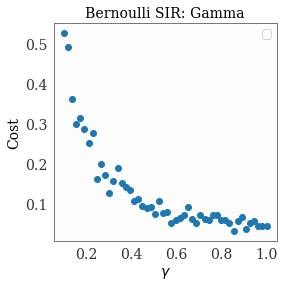

In [54]:
# Cost function
alpha = (times_vs_gamma[N-1] - times_vs_gamma[0]) / (gamma[N-1] - gamma[0]) 
beta = -alpha * gamma[0] + times_vs_gamma[0]

# Plotting figure
plt.figure(figsize=(4, 4))
# plt.scatter(theta[0:N, 0], elapsed_time / elapsed_time.max())
plt.scatter(gamma, times_vs_gamma)
# plt.plot(gamma, cost_linear(gamma, alpha, beta), color = "C1", label = "$c(\\theta)$")
plt.title("Bernoulli SIR: Gamma")
plt.xlabel("$\\gamma$")
plt.ylabel("Cost")
plt.legend()
plt.savefig("gamma_vs_cost.png")
plt.show()

In [58]:
p = torch.linspace(0.001, 1, N)
beta_fixed = 0.3
gamma_fixed = 0.9

n_rep = 10
times_vs_gamma = torch.zeros(N)
for i in range(N):
    print("progress: ", i)
    st = time.time()
    for _ in range(n_rep):
        result = bern_sir.bernSIR(beta_fixed, gamma_fixed, p[i], device=torch.device('cpu'))
    et = time.time()
    times_vs_gamma[i] = (et - st) / n_rep

print(times_vs_gamma)

progress:  0
progress:  1
progress:  2
progress:  3
progress:  4
progress:  5
progress:  6
progress:  7
progress:  8
progress:  9
progress:  10
progress:  11
progress:  12
progress:  13
progress:  14
progress:  15
progress:  16
progress:  17
progress:  18
progress:  19
progress:  20
progress:  21
progress:  22
progress:  23
progress:  24
progress:  25
progress:  26
progress:  27
progress:  28
progress:  29
progress:  30
progress:  31
progress:  32
progress:  33
progress:  34
progress:  35
progress:  36
progress:  37
progress:  38
progress:  39
progress:  40
progress:  41
progress:  42
progress:  43
progress:  44
progress:  45
progress:  46
progress:  47
progress:  48
progress:  49
tensor([4.0348e-03, 3.6690e-04, 2.7295e-03, 6.5506e-03, 1.7675e-02, 3.5775e-02,
        3.3175e-02, 4.5123e-02, 4.6581e-02, 6.4952e-02, 7.0570e-02, 7.7514e-02,
        8.6311e-02, 9.4809e-02, 1.0667e-01, 1.1255e-01, 1.1033e-01, 1.1096e-01,
        1.5510e-01, 1.6187e-01, 1.5854e-01, 1.5125e-01, 1.7306e-01, 1.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


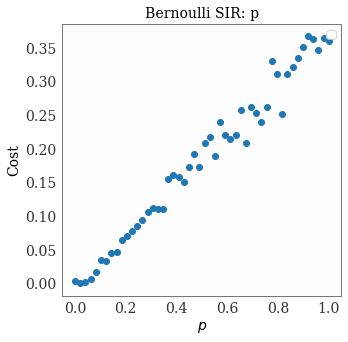

In [63]:
# Plotting figure
plt.figure(figsize=(5, 5))
# plt.scatter(theta[0:N, 0], elapsed_time / elapsed_time.max())
plt.scatter(p, times_vs_gamma)
# plt.plot(gamma, cost_linear(gamma, alpha, beta), color = "C1", label = "$c(\\theta)$")
plt.title("Bernoulli SIR: p")
plt.xlabel("$p$")
plt.ylabel("Cost")
plt.legend()
plt.savefig("p_vs_cost.png")

plt.show()


# Homo SIR

In [10]:
N = 50
n_rep = 10

l = torch.linspace(1, 10, N)
l_fixed = 1

K = torch.arange(0, 10)
K_fixed = 1

In [69]:
homo_lambda = torch.zeros(N)
for i in range(N):
    print("progress: ", i)
    st = time.time()
    for _ in range(n_rep):
        result = homo_sir.homoSIR(l[i], K_fixed, device=torch.device('cpu'))
    et = time.time()
    homo_lambda[i] = (et - st) / n_rep

print(homo_lambda)

progress:  0
progress:  1
progress:  2
progress:  3
progress:  4
progress:  5
progress:  6
progress:  7
progress:  8
progress:  9
progress:  10
progress:  11
progress:  12
progress:  13
progress:  14
progress:  15
progress:  16
progress:  17
progress:  18
progress:  19
progress:  20
progress:  21
progress:  22
progress:  23
progress:  24
progress:  25
progress:  26
progress:  27
progress:  28
progress:  29
progress:  30
progress:  31
progress:  32
progress:  33
progress:  34
progress:  35
progress:  36
progress:  37
progress:  38
progress:  39
progress:  40
progress:  41
progress:  42
progress:  43
progress:  44
progress:  45
progress:  46
progress:  47
progress:  48
progress:  49
tensor([0.0003, 0.0012, 0.0049, 0.0095, 0.0138, 0.0159, 0.0199, 0.0140, 0.0317,
        0.0283, 0.0291, 0.0278, 0.0469, 0.0323, 0.0290, 0.0381, 0.0408, 0.0404,
        0.0412, 0.0431, 0.0448, 0.0455, 0.0512, 0.0510, 0.0524, 0.0547, 0.0517,
        0.0354, 0.0527, 0.0593, 0.0483, 0.0552, 0.0490, 0.0642, 0.0578

In [9]:
# Plotting figure
plt.figure(figsize=(5, 5))
plt.scatter(l, homo_lambda)
plt.title("Homo SIR: lambda")
plt.xlabel("$\\lambda$")
plt.ylabel("Cost")
plt.legend()
# plt.savefig("homo_lambda_vs_cost.png")

plt.show()

NameError: name 'l' is not defined

<Figure size 360x360 with 0 Axes>

In [89]:
N = K.size(0)
homo_K = torch.zeros(N)
for i in range(N):
    print("progress: ", i)
    st = time.time()
    for _ in range(100):
        result = homo_sir.homoSIR(l_fixed, K[i].float(), device=torch.device('cpu'))
    et = time.time()
    homo_K[i] = (et - st) / n_rep

print(homo_K)

progress:  0
progress:  1
progress:  2
progress:  3
progress:  4
progress:  5
progress:  6
progress:  7
progress:  8
progress:  9
tensor([0.0023, 0.0043, 0.2541, 0.4132, 0.4828, 0.5397, 0.6027, 0.6271, 0.7036,
        0.7343])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


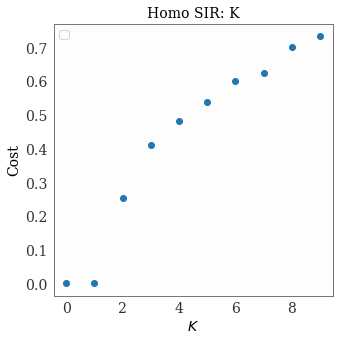

In [90]:
# Plotting figure
plt.figure(figsize=(5, 5))
plt.scatter(K, homo_K)
plt.title("Homo SIR: K")
plt.xlabel("$K$")
plt.ylabel("Cost")
plt.legend()
# plt.savefig("homo_K_vs_cost.png")

plt.show()

In [16]:
prior = utils.BoxUniform(low=torch.ones(1), high=1000 * torch.ones(1))

In [45]:
inference = CostAwareSNPE_C()

In [46]:
theta = torch.load("data/theta.pt")
x = torch.load("data/sim_data.pt")
obs_data = torch.load("data/obs_data.pt")
weights = torch.load("data/weights.pt")

In [47]:
density_estimator = inference.append_simulations(theta, x, proposal=None).append_weights(weights).train()

/Users/huangd5/anaconda3/lib/python3.9/site-packages/sbi/neural_nets/flow.py:141: UserWarning: In one-dimensional output space, this flow is limited to Gaussians
  warn("In one-dimensional output space, this flow is limited to Gaussians")


 Neural network successfully converged after 91 epochs.

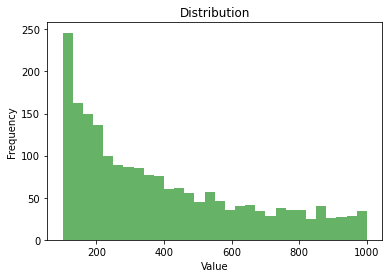

In [20]:
import matplotlib.pyplot as plt

plt.hist(theta.numpy(), bins=30, alpha=0.6, color='g')

plt.title('Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

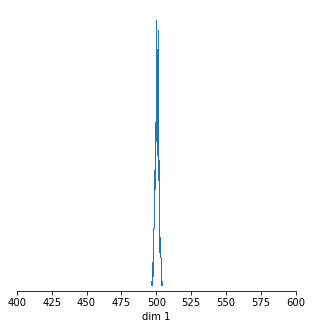

In [48]:
posterior = inference.build_posterior(density_estimator, prior=prior)

posterior_samples = posterior.sample((1000,), x=obs_data)

# plot posterior samples
_ = analysis.pairplot(
    posterior_samples, limits=[[400, 600]], figsize=(5, 5)
)

In [32]:
inference_uniform = SNPE_C()

In [33]:
theta_uniform = torch.load("data/theta_uniform.pt")
x_uniform = torch.load("data/sim_data_uniform.pt")

In [34]:
density_estimator_uniform = inference_uniform.append_simulations(theta_uniform, x_uniform).train()
posterior_uniform = inference_uniform.build_posterior(density_estimator_uniform, prior=prior)

/Users/huangd5/anaconda3/lib/python3.9/site-packages/sbi/neural_nets/flow.py:141: UserWarning: In one-dimensional output space, this flow is limited to Gaussians
  warn("In one-dimensional output space, this flow is limited to Gaussians")


 Neural network successfully converged after 84 epochs.

In [35]:
posterior_samples_uniform = posterior_uniform.sample((1000,), x=obs_data)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

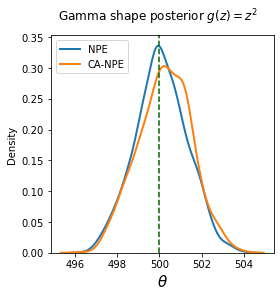

In [51]:
fig, axes = plt.subplots(1, figsize=(4, 4))
fig.suptitle('Gamma shape posterior $g(z) = z^2$')

sns.kdeplot(posterior_samples_uniform[:,0], color = "C0", linewidth = 2, linestyle = "solid", label = "NPE")
sns.kdeplot(posterior_samples[:,0], color = "C1", linewidth = 2, linestyle = "solid", label = "CA-NPE")
axes.set_xlabel("$\\theta$", fontsize = 15)
axes.axvline(500, color = "darkgreen", linestyle = "dashed")
plt.legend(loc = 'upper left', fontsize = 10)
# plt.show()
plt.savefig("cost_aware_npe.png")